$$
ETL
$$

In [ ]:

import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium  import webdriver
import requests
import io


In [57]:
class Extraccion_Url:
    def __init__(self,url):
        
        ''' 
        Este código utiliza Selenium para abrir la página web especificada en la variable url y esperar a que se cargue la tabla dinámica.
        Luego, se extrae el código HTML de la página y se usa BeautifulSoup y pandas para extraer la tabla y guardarla en un DataFrame
        '''
        # Url de Agencia Meteorologia de japon. Información de Terremotos dinamica
        self.url = url

        # Configura el driver de Selenium (en este caso, se usa Chrome)
        options = webdriver.ChromeOptions()
        options.add_argument('--headless') # Ejecuta el navegador en modo headless (sin interfaz gráfica)
        driver = webdriver.Chrome(options=options)

        # Abre la página web con Selenium
        driver.get(self.url)

        # Espera a que se cargue la tabla dinámica (ajusta el tiempo según sea necesario)
        time.sleep(5)

        # Extrae el código HTML de la página
        html = driver.page_source

        # Usa BeautifulSoup y pandas para extraer la tabla
        soup = BeautifulSoup(html, 'html.parser')
        table = soup.find_all('table')[0]
        self.df = pd.read_html(str(table))[0]
        
        
        # Cierra el driver de Selenium
        driver.quit()

    def informacion_6_datos(self,p):

        if p==1: 
            print('Visualizar Data Frame.')
            return self.df.head(5)
        elif p==2:
            print('Tamaño del Data Frame.')
            return self.df.shape
        elif p==3:
            print('Resumen estadistico del Data Frame.')
            return self.df.describe()
        elif p==4:
            print('Hallar valores nulos en el Data Frame.')
            return self.df.isnull().sum()
        elif p==5:
            print('Informacion sobre el tipo de datos y cantidad de valores no nulos del Data Frame.')
            return self.df.info()
        elif p==6:
            print('Resumen estadistico del Data Frame que excluye los numeros.')
            return self.df.describe(exclude='number')

    def matriz_correlacion(self,pais,variables):
        #grafico para ver la relación entre las variable
        # Seleccionar las columnas a incluir en la matriz de correlación
        cols = variables

        # Crear la matriz de correlación
        corr = self.df[cols].corr()

        # Crear el gráfico de correlación utilizando la biblioteca Seaborn
        sns.set(style="white")
        mask = np.triu(np.ones_like(corr, dtype=np.bool_))
        fig, ax = plt.subplots(figsize=(10, 8))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
        plt.title('Matriz de correlación de los datos de sismos en '+pais)
        return plt.show()

$$
JAPON
$$

In [46]:
Japon =  Extraccion_Url('http://ds.iris.edu/ieb/evtable.phtml?caller=IEB&st=1970-01-01&et=2025-01-01&minmag=6&maxmag=10&orderby=time-desc&src=usgs&limit=5000&maxlat=56.000&minlat=22.000&maxlon=159.000&minlon=127.000&sbl=1&pbl=1&caller=self&name=Japan%20Region&zm=3&mt=ter&rgn=Japan%20Region&title=IEB%20export%3A%20786%20earthquakes%20as%20a%20sortable%20table.&stitle=from%201970-01-01%20to%20the%20latest%20available%2C%20with%20magnitudes%20from%206%20to%2010%2C%20all%20depths%2C%20with%20priority%20for%20most%20recent%2C%20limited%20to%205000%2C%20%20showing%20data%20from%20USGS%2C%20')

In [47]:
Japon.informacion_6_datos(1)

Visualizar Data Frame.


,Year,Month,Day,Time UTC,Mag,Lat,Lon,Depth km,Region,USGS ID,Timestamp
0,2023,5,5,05:42:04,6.2,37.5402,137.3053,8.7,"49 km NE of Anamizu, Japan",us6000k9mb,1683265324
1,2023,4,3,03:06:57,6.5,52.7227,158.4935,101.0,"23 km SSE of Vilyuchinsk, Russia",us6000k1mn,1680491217
2,2023,3,28,09:18:28,6.0,41.1480,142.8050,34.0,"129 km ENE of Misawa, Japan",us6000k09q,1679995108
3,2023,2,25,13:27:43,6.0,42.8417,144.9973,51.8,"52 km ESE of Kushiro, Japan",us6000jrjl,1677331663
4,2023,1,16,04:49:51,6.3,28.9804,139.3452,405.0,"Bonin Islands, Japan region",us7000j4mj,1673844591


In [48]:
Japon.informacion_6_datos(2)

Tamaño del Data Frame.


(786, 11)

In [49]:
Japon.informacion_6_datos(3)

Resumen estadistico del Data Frame.


,Year,Month,Day,Mag,Lat,Lon,Depth km,Timestamp
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,7.860000e+02
mean,1997.001272,6.468193,15.451654,6.378372,39.620419,143.594432,99.079135,8.676861e+08
std,14.691087,3.470660,8.369086,0.433578,6.790178,6.864316,154.593090,4.633572e+08
min,1970.000000,1.000000,1.000000,6.000000,22.013000,127.367400,0.000000,1.704785e+06
25%,1985.250000,3.000000,9.000000,6.100000,35.384975,140.461000,21.025000,5.022043e+08
50%,1997.000000,6.000000,15.000000,6.200000,39.823700,142.705500,34.500000,8.661992e+08
75%,2011.000000,10.000000,22.000000,6.500000,44.438850,148.057000,61.075000,1.299824e+09
max,2023.000000,12.000000,31.000000,9.100000,55.970400,158.659000,664.000000,1.683265e+09


In [50]:
Japon.informacion_6_datos(4)

Hallar valores nulos en el Data Frame.


Year         0
Month        0
Day          0
Time UTC     0
Mag          0
Lat          0
Lon          0
Depth km     0
Region       0
USGS ID      0
Timestamp    0
dtype: int64

In [42]:
Japon.informacion_6_datos(5)

Informacion sobre el tipo de datos y cantidad de valores no nulos del Data Frame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       786 non-null    int64  
 1   Month      786 non-null    int64  
 2   Day        786 non-null    int64  
 3   Time UTC   786 non-null    object 
 4   Mag        786 non-null    float64
 5   Lat        786 non-null    float64
 6   Lon        786 non-null    float64
 7   Depth km   786 non-null    float64
 8   Region     786 non-null    object 
 9   USGS ID    786 non-null    object 
 10  Timestamp  786 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 67.7+ KB


In [43]:
Japon.informacion_6_datos(6)

Resumen estadistico del Data Frame que excluye los numeros.


,Time UTC,Region,USGS ID
count,786,786,786
unique,782,128,786
top,13:37:03,Kuril Islands,us6000k9mb
freq,2,162,1


$$
CHILE
$$

In [51]:
Chile = Extraccion_Url('http://www.csn.uchile.cl/sismologia/grandes-terremotos-en-chile/')

In [4]:
Chile.informacion_6_datos(1)

Visualizar Data Frame.


,Fecha local,Hora local,Latitud,Longitud,Magnitud Ms,Magnitud Mw,Profundidad [km],Efecto
0,08/02/1570,9:00,-36.800,-73.00,8.3,-,-,TD
1,17/03/1575,10:00,-33.400,-70.60,7.3,-,-,-
2,16/12/1575,14:30,-39.800,-73.20,8.5,-,-,TD
3,24/11/1604,12:30,-18.500,-70.40,8.5,-,30,TD
4,16/09/1615,23:30,-18.500,-70.35,8.8,-,-,TM


In [5]:
Chile.informacion_6_datos(2)

Tamaño del Data Frame.


(113, 8)

In [6]:
Chile.informacion_6_datos(3)

Resumen estadistico del Data Frame.


,Longitud
count,113.000000
mean,-1952.617584
std,11443.207220
min,-72000.000000
25%,-73.000000
50%,-71.180000
75%,-70.350000
max,-67.500000


In [7]:
Chile.informacion_6_datos(4)

Hallar valores nulos en el Data Frame.


Fecha local         0
Hora local          0
Latitud             0
Longitud            0
Magnitud Ms         0
Magnitud Mw         0
Profundidad [km]    0
Efecto              0
dtype: int64

In [8]:
Chile.informacion_6_datos(5)

Informacion sobre el tipo de datos y cantidad de valores no nulos del Data Frame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha local       113 non-null    object 
 1   Hora local        113 non-null    object 
 2   Latitud           113 non-null    object 
 3   Longitud          113 non-null    float64
 4   Magnitud Ms       113 non-null    object 
 5   Magnitud Mw       113 non-null    object 
 6   Profundidad [km]  113 non-null    object 
 7   Efecto            113 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.2+ KB


In [9]:
Chile.informacion_6_datos(6)

Resumen estadistico del Data Frame que excluye los numeros.


,Fecha local,Hora local,Latitud,Magnitud Ms,Magnitud Mw,Profundidad [km],Efecto
count,113,113,113,113,113,113,113
unique,111,100,84,22,11,37,4
top,22/05/1960,8:00,-18.500,7.3,-,-,-
freq,2,3,6,22,100,52,79


$$
EEUU
$$

* Analsis de datos extraidos de USGS (El Servicio Geologico de los Estados Unidos )https://earthquake.usgs.gov/fdsnws/event/1/

In [60]:
import requests

url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&endtime=now'
response = requests.get(url)
dfEEUU = pd.read_csv(io.StringIO(response.text))

In [61]:
dfEEUU.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-05-05T16:02:13.482Z,62.9451,-149.461700,67.000000,1.00,ml,NaN,NaN,NaN,0.75,...,2023-05-05T16:04:05.714Z,"56 km SSW of Cantwell, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak
1,2023-05-05T15:56:00.940Z,19.1665,-155.493668,35.029999,2.47,ml,42.0,112.0,NaN,0.12,...,2023-05-05T16:01:31.330Z,"4 km SSW of P?hala, Hawaii",earthquake,0.52,0.72,3.34,7.0,automatic,hv,hv


In [13]:
dfEEUU.shape

(12212, 22)

contamos con 12163 filas y 22 columnas

In [22]:
dfEEUU['magType'].unique()

array(['ml', 'md', 'mb', 'mwr', 'mww', 'mb_lg', 'mw', 'mlr', 'mlv', 'mh'],
      dtype=object)

In [23]:
dfEEUU.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

Significado de sus columnas:

1-"time": indica la fecha y hora exacta en que ocurrió el sismo, expresada en formato UTC (Tiempo Universal Coordinado) y en milisegundos desde la medianoche del 1 de enero de 1970.

2-"latitude": es la coordenada geográfica de la latitud del epicentro del sismo, expresada en grados decimales.

3-"longitude": es la coordenada geográfica de la longitud del epicentro del sismo, expresada en grados decimales.

4-"depth": es la profundidad del epicentro del sismo, expresada en kilómetros.

5-"mag": es la magnitud del sismo, que mide la energía liberada en el evento. La escala más comúnmente utilizada para medir la magnitud es la escala de Richter.

6-"magType": indica la escala o método utilizado para calcular la magnitud del sismo, como por ejemplo, la escala de Richter, la escala de magnitud de momento o la escala de magnitud de onda superficial. Los sinificados de sus valores son los siguientes:

"md": se refiere a la magnitud calculada usando la escala de duración, que es una escala de magnitud basada en la duración de la onda sísmica.

"ml": se refiere a la magnitud calculada usando la escala de Richter, que es una escala de magnitud que se basa en la amplitud de las ondas sísmicas registradas en un sismógrafo.

"mb": se refiere a la magnitud calculada usando la escala de onda de cuerpo superficial, que se basa en la amplitud de las ondas sísmicas de cuerpo y superficie.

"mww": se refiere a la magnitud calculada usando la escala de momento sísmico, que es una escala de magnitud basada en la cantidad total de energía liberada durante el sismo.

"mlr": se refiere a la magnitud calculada usando la escala de Richter revisada, que es una versión actualizada y mejorada de la escala de Richter original.

"mb_lg": se refiere a la magnitud calculada usando una combinación de las escalas de onda de cuerpo y superficie (mb) y la escala de Richter (lg).

"mw": se refiere a la magnitud calculada usando la escala de momento sísmico, pero ajustada para tener en cuenta la atenuación de la energía sísmica en el camino desde el epicentro hasta la superficie.

"mwr": se refiere a la magnitud calculada usando una versión modificada de la escala de momento sísmico que tiene en cuenta la orientación de las fallas geológicas.

"mlv": se refiere a la magnitud calculada usando la escala de Richter local, que es una versión adaptada de la escala de Richter para sismos locales.

"mh": se refiere a la magnitud calculada usando la escala de hipocentro, que es una escala de magnitud que tiene en cuenta la profundidad y ubicación del hipocentro del sismo.


7-"nst": se refiere al número de estaciones sismográficas que registraron el evento.

8-"gap":el ángulo de brecha indica la cantidad de información que falta para calcular la ubicación exacta y la magnitud del sismo, debido a que la red de estaciones sismográficas no tiene una cobertura completa del área afectada por el evento sísmico.

9-"dimn": es la dimensión del evento en kilómetros.

10-"rms": es el error de tiempo de la solución de ubicación del sismo en segundos.

11-"net": es el código de identificación de la red sísmica que registró el evento. Por ejemplo, la red sísmica de Estados Unidos es la USGS (United States Geological Survey) y su código es "us".

12-"id": es el código de identificación único del sismo, que incluye el código de la red sísmica y un número de identificación único. Este código se utiliza para identificar y hacer referencia a un evento sísmico específico.

13-"updated": es la fecha y hora en que se actualizó la información sobre el evento sísmico en la base de datos. Esta información puede actualizarse a medida que se recopilan más datos sobre el sismo.

14-"place": es la ubicación geográfica del sismo, que generalmente se expresa en términos de la ciudad o el estado más cercano al epicentro.

15-"type": se refiere al tipo de evento sísmico registrado, que puede ser un sismo, una réplica o una explosión.

16-"horizontalError": es el error horizontal asociado con la ubicación del epicentro del sismo, expresado en kilómetros. Este valor indica la incertidumbre en la ubicación horizontal del epicentro.

17-"depthError": es el error asociado con la profundidad del epicentro del sismo, expresado en kilómetros. Este valor indica la incertidumbre en la profundidad del epicentro.

18-"magError": es el error asociado con la magnitud del sismo, expresado en unidades de magnitud (por ejemplo, en unidades de Richter). Este valor indica la incertidumbre en la magnitud del sismo.

19-"magNst": es el número de estaciones sísmicas que se utilizaron para calcular la magnitud del sismo.

20-"status": indica si la información sobre el sismo es "automática" o "revisada", es decir, si ha sido revisada por un sismólogo para corregir o ajustar los valores originales de la información sísmica.

21-"locationSource": es el código de identificación de la fuente de los datos de ubicación del sismo, que puede ser una red sísmica específica o una base de datos geográfica.

22-"magSource": es el código de identificación de la fuente de los datos de magnitud del sismo, que puede ser una red sísmica específica o una base de datos de magnitud.

In [24]:
dfEEUU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             12212 non-null  object 
 1   latitude         12212 non-null  float64
 2   longitude        12212 non-null  float64
 3   depth            12212 non-null  float64
 4   mag              12212 non-null  float64
 5   magType          12212 non-null  object 
 6   nst              8769 non-null   float64
 7   gap              8769 non-null   float64
 8   dmin             6535 non-null   float64
 9   rms              12212 non-null  float64
 10  net              12212 non-null  object 
 11  id               12212 non-null  object 
 12  updated          12212 non-null  object 
 13  place            11879 non-null  object 
 14  type             12212 non-null  object 
 15  horizontalError  8050 non-null   float64
 16  depthError       12212 non-null  float64
 17  magError    

Las columnas que tienen faltantes significativos son:
 dmin, o sea la de dimnensión en km, gap: información que falta para calcular ubicación exacta, nst:estaciones que registraron el sismo,horizontalError: incertidumbre en localización del hepicentro,magerror: incertidumbre en magnitud del sismo,magNst: número de estaciones que se registraron el sismo.

In [25]:
dfEEUU.describe(exclude='number')

,time,magType,net,id,updated,place,type,status,locationSource,magSource
count,12212,12212,12212,12212,12212,11879,12212,12212,12212,12212
unique,12211,10,15,12212,12212,5988,6,2,15,16
top,2023-04-20T04:01:05.350Z,ml,ak,ci40219199,2023-05-04T21:48:22.450Z,"7km NW of The Geysers, CA",earthquake,reviewed,ak,ak
freq,2,8144,3443,1,1,159,11955,10608,3443,3444


el ultimo gran sismo 20 de abril 2023, medido en escala de richter, se registro en alaska a 7 kilómetros al noroeste de The Geysers, California.El evento ha sido revisado y confirmado por un sismólogo o un experto en la materia."ak" es la agencia responsable de la detección y registro del evento.

In [34]:
#aca convierto columna time a datetime para posterior utilizacion

dfEEUU['time'] = pd.to_datetime(dfEEUU['time'])


In [ ]:
['time', 'latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 
                        'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']

In [47]:
class Analisis_Grafico:
        def __init__(self,df):

                self.df = df
        def matriz_correlacion(self,pais,variables):
                #grafico para ver la relación entre las variable
                # Seleccionar las columnas a incluir en la matriz de correlación
                cols = variables

                # Crear la matriz de correlación
                corr = self.df[cols].corr()

                # Crear el gráfico de correlación utilizando la biblioteca Seaborn
                sns.set(style="white")
                mask = np.triu(np.ones_like(corr, dtype=np.bool_))
                fig, ax = plt.subplots(figsize=(10, 8))
                cmap = sns.diverging_palette(220, 10, as_cmap=True)
                sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5})
                plt.title('Matriz de correlación de los datos de sismos en '+pais)
                return plt.show()


In [48]:
EEUU = Analisis_Grafico(dfEEUU)

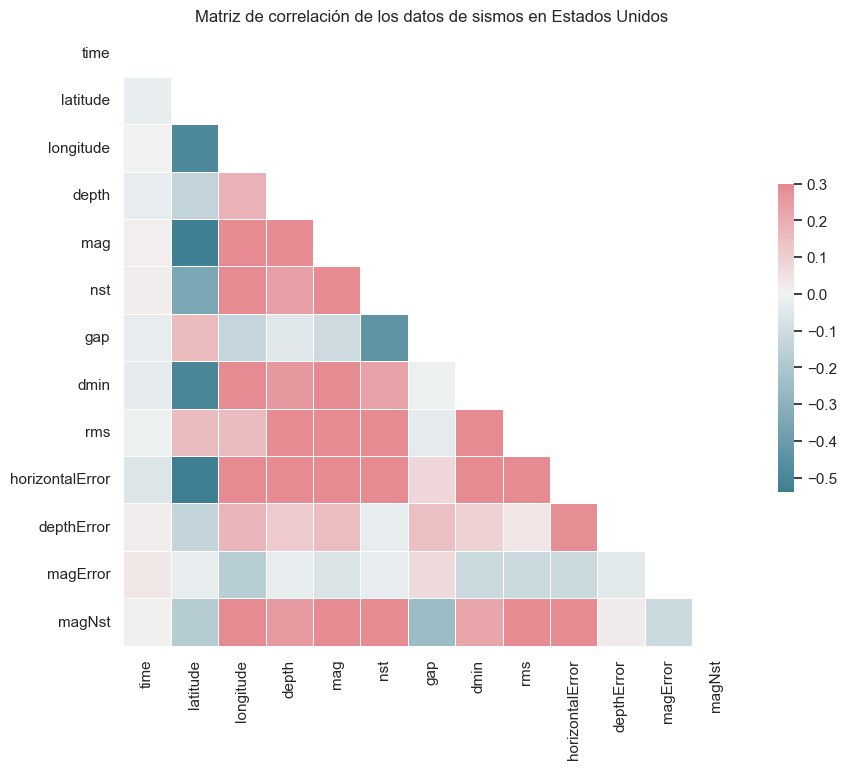

In [49]:
EEUU.matriz_correlacion('Estados Unidos',['time', 'latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 
                        'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst'])

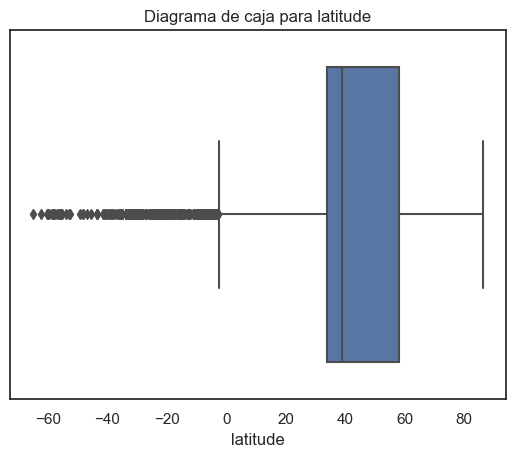

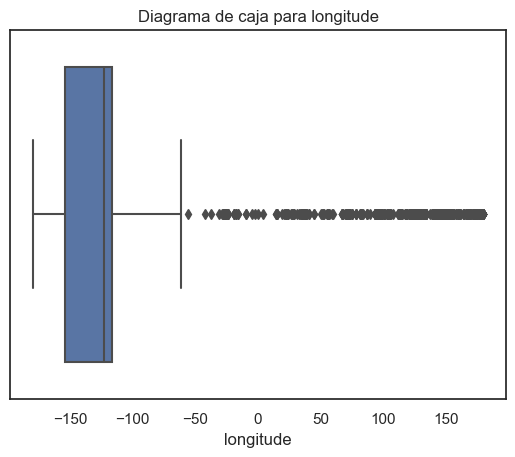

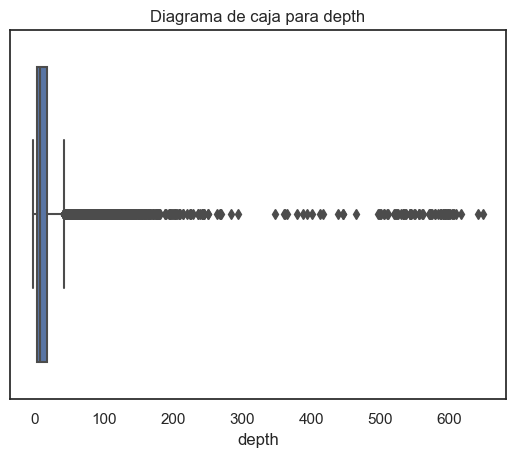

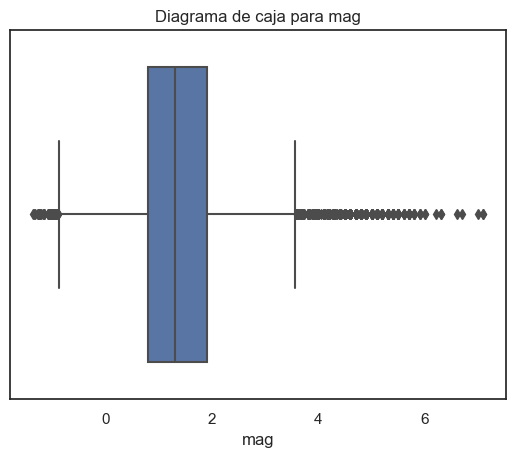

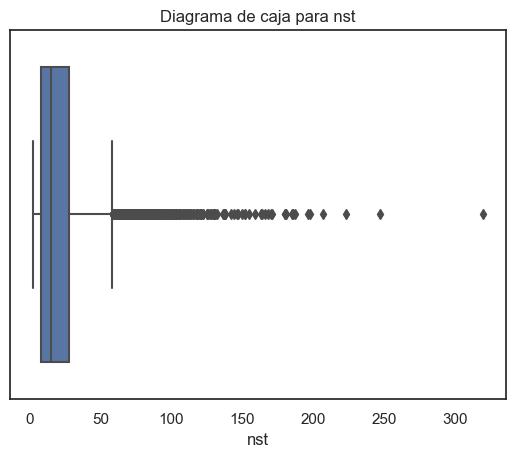

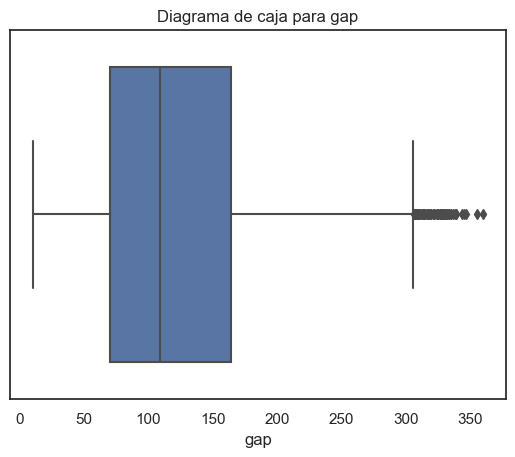

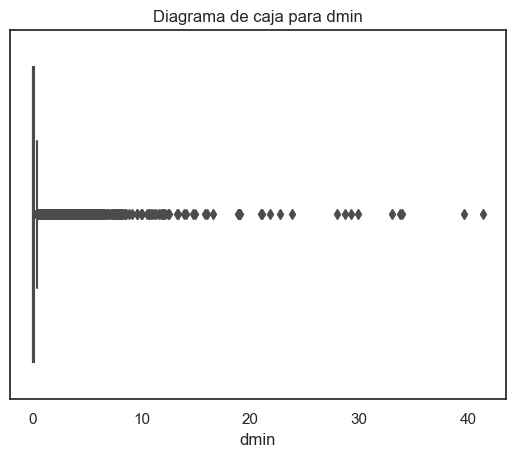

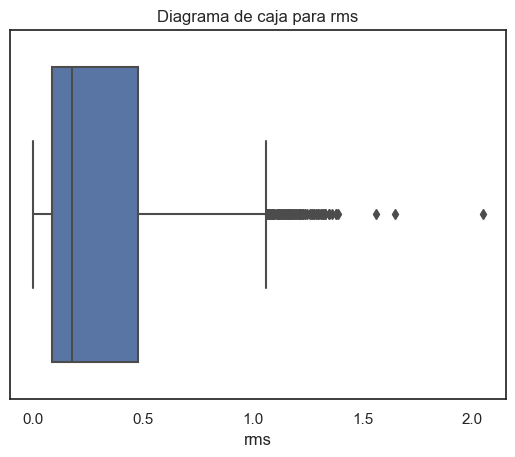

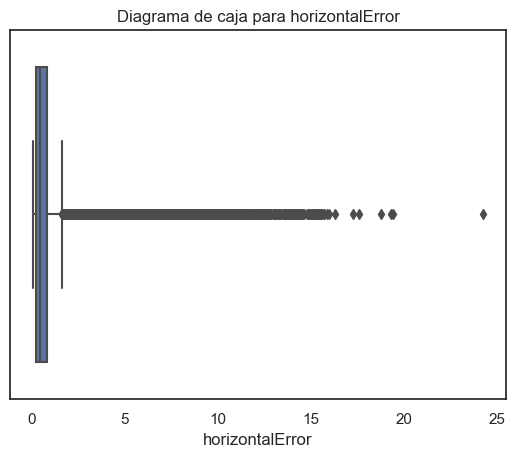

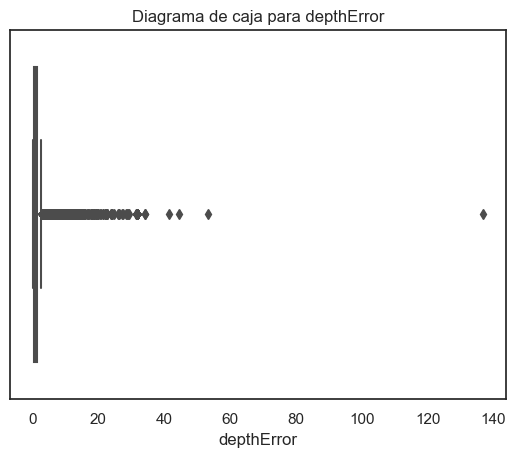

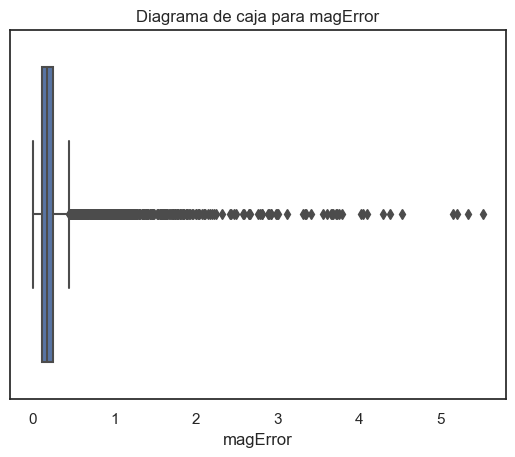

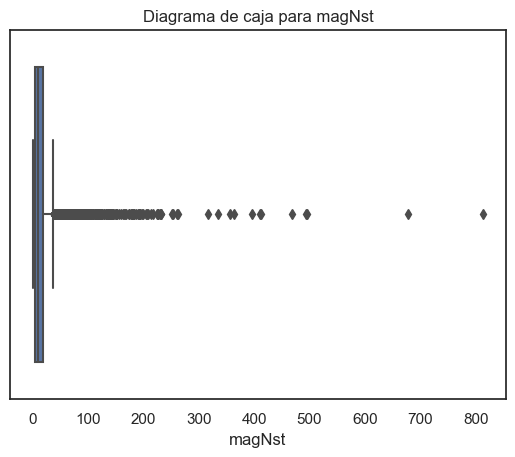

In [30]:
#aca se genera un diagrama de caja para ver los outlier


# Seleccionar las columnas a incluir en el diagrama de caja
cols = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 
        'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']

# Crear un diagrama de caja para cada columna utilizando la biblioteca Seaborn
for col in cols:
    plt.figure()
    sns.boxplot(x=dfEEUU[col])
    plt.title('Diagrama de caja para ' + col)
    plt.show()
